#SCRAPE A WEBSITE ABOUT BOOKS: http://books.toscrape.com/ 



- You can use everything we learnt in class (eg.: Beutifulsoup), and don't forget you can use google if you got stuck!
- GOOD LUCK, and don't forget you can ask for help on Slack!

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pwd

'/content'

In [ ]:
cd 'drive/My Drive/ECPR_winter2021_kermer/LECTURE_2/'

/content/drive/My Drive/ECPR_winter2021_kermer/LECTURE_2


Desired function:
- Choose a book category from the left (Romance, Mystery...etc)
Hint: Be aware how the url will change
- Check out the source code and write some code to automatically create a dictionary with the following information of each book 


```
books={'name':name_of_the_book,
       'price':price,
       'rating':num_stars}
```

- Make sure your code works if you change the categories too




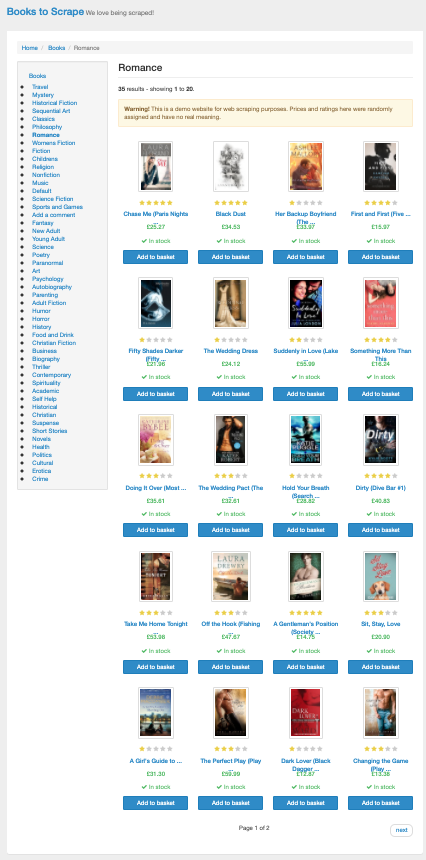

In [ ]:
from IPython.display import Image
Image('books.png', format='png')

In [ ]:
# Connect to url of thriller books
thriller_books_link = "http://books.toscrape.com/catalogue/category/books/thriller_37/index.html"

# Request
import requests #Nice Module to help to download the raw html file as a text
text = requests.get(thriller_books_link).text

# Import BS

from bs4 import BeautifulSoup
soup=BeautifulSoup(text, "html.parser") 
type(soup)
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   Thriller | 
     Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="
    
" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="../../../../static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="../../../../static/oscar/css/styles

In [ ]:
#Use BS to scrape for information relating to the thriller books only
book_containers= soup.find_all(attrs={'class':'product_pod'})
book_containers

[<article class="product_pod">
 <div class="image_container">
 <a href="../../../in-her-wake_980/index.html"><img alt="In Her Wake" class="thumbnail" src="../../../../media/cache/5d/72/5d72709c6a7a9584a4d1cf07648bfce1.jpg"/></a>
 </div>
 <p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="../../../in-her-wake_980/index.html" title="In Her Wake">In Her Wake</a></h3>
 <div class="product_price">
 <p class="price_color">Â£12.84</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>, <article class="product_pod">
 <div class="image_container">
 <a href="../../../the-elephant-tree_968/index.html"><img alt="The Elephant Tree" class="thumbnail" src="../../../../media/cache/5d/

In [ ]:
#Scrape for title of book only
names= []
for book in book_containers:
  names.append(book.h3.a.get('title'))
names

['In Her Wake',
 'The Elephant Tree',
 'Behind Closed Doors',
 'You (You #1)',
 'The Guilty (Will Robie #4)',
 'The 14th Colony (Cotton Malone #11)',
 'Give It Back',
 'Killing Floor (Jack Reacher #1)',
 'The Bone Hunters (Lexy Vaughan & Steven Macaulay #2)',
 'Far From True (Promise Falls Trilogy #2)',
 'The Travelers']

In [ ]:
#Scrape for prices only
prices= []
for book in book_containers:
  prices.append(book.find('p', class_="price_color").text[2:])
prices

['12.84',
 '23.82',
 '52.22',
 '43.61',
 '13.82',
 '39.24',
 '18.32',
 '31.49',
 '59.71',
 '34.93',
 '15.77']

In [ ]:
# Scrape for reviews only
import re
ratings= []
for book in book_containers:
  ratings.append(book.find("p", class_ = re.compile("star-rating")).get("class")[1])

ratings

['One',
 'Five',
 'Four',
 'Five',
 'Two',
 'One',
 'Two',
 'Four',
 'Three',
 'Two',
 'One']

In [ ]:
# creating the data frame with the lists

import pandas as pd
books_df= pd.DataFrame(list(zip(names, prices, ratings)), columns=['titles','prices (£)', 'rating' ])
books_df.head()

,titles,prices (£),rating
0,In Her Wake,12.84,One
1,The Elephant Tree,23.82,Five
2,Behind Closed Doors,52.22,Four
3,You (You #1),43.61,Five
4,The Guilty (Will Robie #4),13.82,Two


# Great work!

The next step can be to put everythin into a function that takes the link and returns the dataframe. I liked that you left comments in your code, it is a good practice!